In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df_raw = pd.read_csv('train.csv')
print(df_raw.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [4]:
df_raw.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [5]:
df_clean = df_raw.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(df_clean.shape)

(24117894, 24)


In [6]:
from sklearn.utils import resample

size = 100000
df_resampled_random = resample(df_clean, replace=False, n_samples=size, random_state=42)    

print(df_resampled_random.shape)

(100000, 24)


In [7]:
df_resampled_random.to_csv('expedia_resampled_random.csv', index=False)

In [8]:
from sklearn.utils import resample

df_resampled_equal = pd.DataFrame()
class_size = 1000
classes = df_clean['hotel_cluster'].unique()

for c in classes:
    class_data = df_clean[df_clean.hotel_cluster == c]
    class_data_resampled = resample(class_data, replace=False, n_samples=class_size, random_state=42)    
    df_resampled_equal = pd.concat([df_resampled_equal, class_data_resampled])

print(df_resampled_equal.shape)

(100000, 24)


In [9]:
df_resampled_equal.to_csv('expedia_resampled_equal.csv', index=False)

In [7]:
df_resampled_random = pd.read_csv('../expedia_resampled_random.csv')
df_resampled_equal = pd.read_csv('../expedia_resampled_equal.csv')

Text(0.5, 0, 'Hotel cluster')

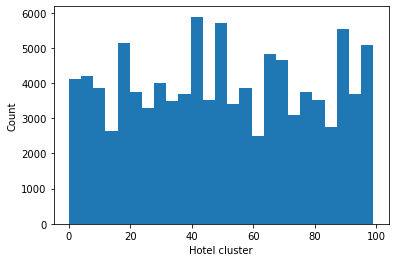

In [8]:
# Plot target label distribution of random resampling
plt.hist(df_resampled_random['hotel_cluster'], bins=25)
plt.ylabel('Count')
plt.xlabel('Hotel cluster')

Text(0.5, 0, 'Hotel cluster')

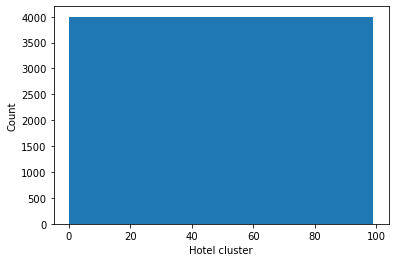

In [9]:
# Plot target label distribution of equal resampling
plt.hist(df_resampled_equal['hotel_cluster'], bins=25)
plt.ylabel('Count')
plt.xlabel('Hotel cluster')

In [10]:
df_dropped = df_resampled_equal.copy()

df_dropped = df_dropped.drop(['date_time'], axis=1)
df_dropped = df_dropped.drop(['user_id'], axis=1)
df_dropped = df_dropped.drop(['srch_ci'], axis=1)
df_dropped = df_dropped.drop(['srch_co'], axis=1)
df_dropped = df_dropped.drop(['site_name'], axis=1)

print(df_dropped.shape)
print(df_dropped.columns)
print(df_dropped.head())

(100000, 19)
Index(['posa_continent', 'user_location_country', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'is_mobile',
       'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')
   posa_continent  user_location_country  user_location_region  \
0               3                     66                   337   
1               3                     66                   174   
2               3                    205                   343   
3               1                     46                   242   
4               3                     66                   363   

   user_location_city  orig_destination_distance  is_mobile  is_package  \
0               11682                  2214.1679          1           1   
1                6735  

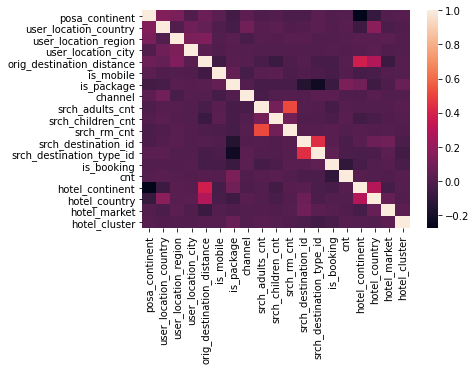

In [11]:
import seaborn as sns

corr = df_dropped.corr()
ax = sns.heatmap(corr)

Text(0.5, 0, 'user_location_country')

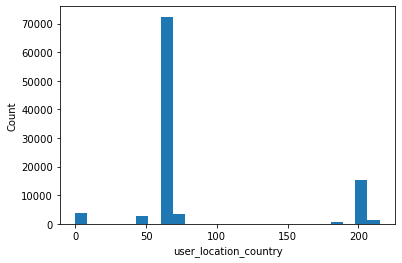

In [12]:
# Plot distribution of a feature
feature = 'srch_rm_cnt'
feature = 'posa_continent'
feature = 'user_location_country'


plt.hist(df_dropped[feature], bins=25)
plt.ylabel('Count')
plt.xlabel(feature)

In [14]:
data = pd.get_dummies(df_dropped)
print(data.shape)

(100000, 19)


In [15]:
X = data.drop(['hotel_cluster'], axis=1)
Y = data['hotel_cluster']

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

n = 8
selector = SelectKBest(chi2, k=n)
X_new = selector.fit_transform(X, Y)

print(X_new.shape)
#print(X_new.columns)

mask = selector.get_support()
new_features = X.columns[mask]
print(new_features)

(100000, 8)
Index(['user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'srch_destination_id', 'hotel_continent',
       'hotel_country', 'hotel_market'],
      dtype='object')


In [17]:
# Normal data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Feature selection data
#X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.25, random_state=42)

print(X_train.shape)

(75000, 18)


In [18]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(multi_class='multinomial', solver='saga')
reg.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)

C:\Users\chskr\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [30]:
print(y_test_pred)
print(y_test)
y_test.unique()


[95  2 90 ... 27 67 91]
75721    58
80184    87
19864    65
76699     0
92991    63
         ..
21271    38
34014     7
81355    89
65720    52
11627    95
Name: hotel_cluster, Length: 25000, dtype: int64


array([58, 87, 65,  0, 63, 75, 59, 15, 78, 62, 20,  5,  6, 93,  1, 80, 37,
       66, 57, 21, 86,  9, 27, 10, 34, 98, 55, 45, 95, 23, 31, 99, 54, 82,
       61, 18, 88, 44, 13, 32, 29,  3, 49, 33, 22, 11, 76, 60, 48, 84, 91,
       17, 40, 70, 74,  7, 41, 36, 50, 52, 43, 12, 89, 64, 51, 85,  2, 56,
       42, 90, 30, 83, 71, 69, 53, 79, 25, 28, 47, 81, 67, 39, 46, 92, 38,
        4, 14,  8, 26, 94, 16, 24, 73, 97, 96, 19, 68, 72, 77, 35],
      dtype=int64)

In [19]:
y_test_pred_proba = reg.predict_proba(X_test)
sort_index = np.argsort(-y_test_pred_proba)
print(sort_index[:,:5])

[[95 18 56 71 65]
 [ 2  9 97 25 11]
 [90 59  9 25  2]
 ...
 [27 46 64 12 58]
 [67 43 53 20 30]
 [91 39 50 13 94]]


In [37]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def rmse_value(predicted, test):
    print(predicted)
    print(test)
    return sqrt(mean_squared_error(predicted, test))

In [38]:
rmse_value(y_test,y_test_pred)

75721    58
80184    87
19864    65
76699     0
92991    63
         ..
21271    38
34014     7
81355    89
65720    52
11627    95
Name: hotel_cluster, Length: 25000, dtype: int64
[95  2 90 ... 27 67 91]


39.413977723645196